In [10]:
from __future__ import print_function
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random

In [249]:
%matplotlib inline
sns.set(style="whitegrid", palette="colorblind", font_scale=1.4, rc={'font.family':'NanumGothic'} )

In [283]:
## 사진 데이터 로드 
pic_ds = pd.read_pickle('./resource/pic_ds.pkl')
pic_ds.sort('datetime', inplace=True)

In [73]:
pic_ds.head(2)

,image_name,datetime,latitude,longitude,model,resolution,year,year_day,date,addr,place,class,person,me_smiling,me_age,wife_smiling,wife_age,junior_smiling,junior_age
875,IMG_0958.JPG,2012-03-23 18:53:24,37.409667,127.134333,iPhone 4S,480X640,2012,83.786806,2012-03-23,경기도_성남시_분당구_야탑3동,야탑_이전집근처,집근처,2,7.18004,34,43.4948,24,0,0
896,IMG_0979.JPG,2012-03-28 07:55:41,37.412167,127.142167,iPhone 4S,480X640,2012,88.329861,2012-03-28,경기도_성남시_분당구_야탑3동,야탑_이전집근처,집근처,2,31.78060,33,52.5534,31,0,0


## 어디에서 많이 찍었는가?

In [74]:
pic_ds['addr_gu'] = pic_ds.addr.apply(lambda x: x.split('_')[1])

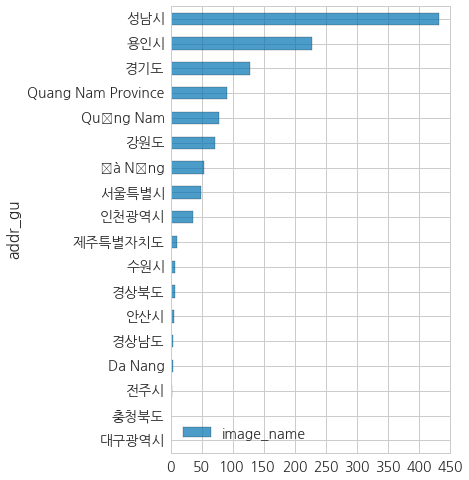

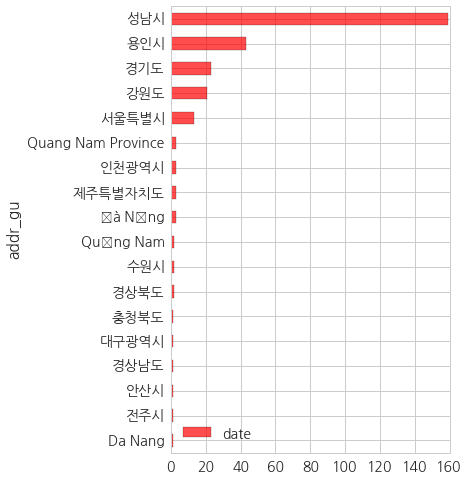

In [75]:
tmp_ds = pic_ds[pic_ds.latitude>0].groupby('addr_gu').agg({'image_name':len, 'date':lambda x: len(np.unique(x)) })

tmp_ds[['image_name']].sort('image_name').plot(kind='barh', figsize=(5,8), alpha=.7)
tmp_ds[['date']].sort('date').plot(kind='barh', figsize=(5,8), color='r', alpha=.7)

## 무엇으로 찍었는가?

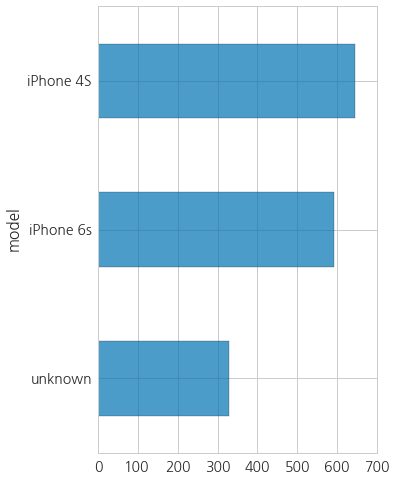

In [76]:
pic_ds.groupby('model').count()[['image_name']].sort('image_name')[-3:]\
    .plot(kind='barh', figsize=(5,8), alpha=.7, legend=False)

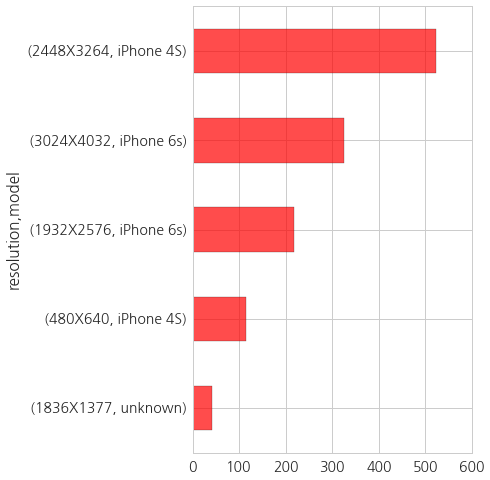

In [81]:
pic_ds.groupby(['resolution','model']).count()[['image_name']].sort('image_name')[-5:]\
    .plot(kind='barh', figsize=(5,8), alpha=.7,color='r', legend=False )

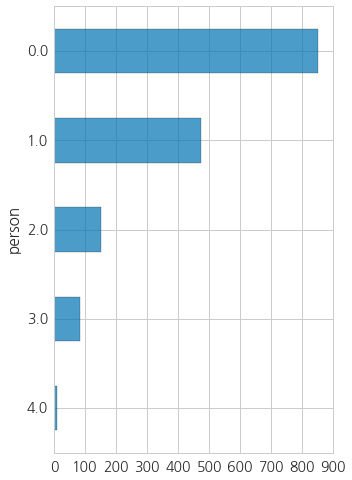

In [90]:
pic_ds.groupby('person').count()[['image_name']].sort('image_name')[4:]\
    .plot(kind='barh', figsize=(5,8), alpha=.7, legend=False)

In [124]:
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import pandas as pd
import calmap

all_days = pd.date_range('1/15/2014', periods=1000, freq='D')
days = np.random.choice(all_days, 1500)
events = pd.Series(np.random.randn(len(days)), index=days)

In [128]:
events.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2015-12-11, ..., 2015-05-29]
Length: 1500, Freq: None, Timezone: None

In [120]:
events

2015-12-11    1.845224
2014-06-17   -0.310579
2014-11-04    1.539787
2014-02-07    0.577678
2016-08-29   -1.246604
2014-05-05   -0.471471
2014-05-21   -1.011500
2014-12-11   -1.161314
2014-04-11   -1.205834
2016-06-23    1.436339
2014-03-27    0.203618
2016-09-13    1.031287
2015-06-13    0.041101
2015-08-14    0.622982
2015-02-03    0.778269
...
2014-06-03   -0.254821
2014-03-09   -0.332731
2014-11-21   -0.079478
2015-10-29    0.606173
2016-05-06   -0.598617
2015-08-04    0.432421
2014-03-07   -1.782426
2015-01-09   -0.935166
2016-07-14    0.313508
2014-04-04   -1.009237
2014-01-18    1.320408
2016-07-23   -1.710295
2014-04-17    0.163257
2015-05-30   -0.513065
2015-05-29   -0.523315
Length: 1500

In [348]:
pic_time_data = pic_ds.groupby('date').count()[['image_name']]

In [355]:
pd.options.display.max_rows=10
day_pics.columns = ['pic count']
day_pics

,pic count
date,
2012-03-23,1
2012-03-28,2
2012-03-30,2
2012-04-07,1
2012-04-10,1
...,...
2016-07-10,5
2016-07-13,1
2016-07-15,17


In [358]:
day_pics = pic_ds.groupby('date').count().image_name
day_pics = day_pics.apply(lambda x : np.log10(x)+5)
day_pics.index = day_pics.index.to_datetime()

2012-03-23    5.00000
2012-03-28    5.30103
2012-03-30    5.30103
...
2016-07-15    6.230449
2016-07-16    6.146128
2016-07-17    5.301030
Name: image_name, Length: 286


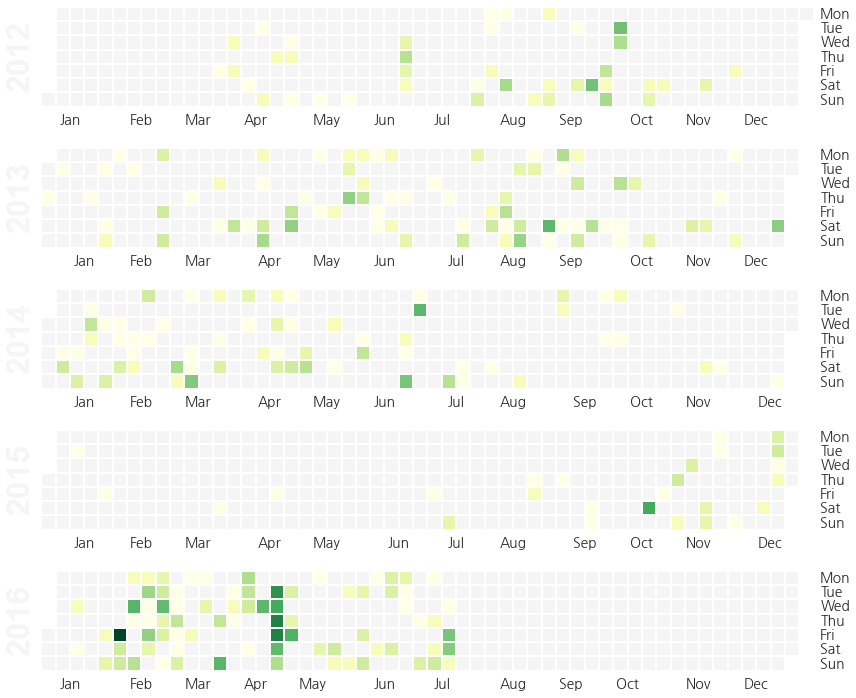

In [359]:
import calmap

calmap.calendarplot(day_pics, fig_kws=dict(figsize=(12, 10)), cmap='YlGn')

print(day_pics)

In [343]:
day_pics

2012-03-23    5.000000
2012-03-28    5.301030
2012-03-30    5.301030
2012-04-07    5.000000
2012-04-10    5.000000
2012-04-15    5.301030
2012-04-19    5.301030
2012-04-25    5.000000
2012-04-26    5.301030
2012-04-29    5.000000
2012-05-13    5.000000
2012-05-27    5.000000
2012-06-20    5.477121
2012-06-21    5.845098
2012-06-22    5.477121
...
2016-06-14    5.602060
2016-06-18    5.602060
2016-06-20    5.477121
2016-06-21    5.000000
2016-06-22    5.000000
2016-06-30    5.000000
2016-07-03    5.602060
2016-07-04    5.000000
2016-07-07    5.301030
2016-07-09    5.301030
2016-07-10    5.698970
2016-07-13    5.000000
2016-07-15    6.230449
2016-07-16    6.146128
2016-07-17    5.301030
Name: image_name, Length: 286

In [210]:
weekday_str = u"월 화 수 목 금 토 일".split()
pic_ds['hour'] = pic_ds['datetime'].apply(lambda x:x.hour)
pic_ds['weekday'] = pic_ds['datetime'].apply(lambda x:weekday_str[x.weekday()])

In [229]:
weekhour_pics = pic_ds.pivot_table(index='weekday', columns='hour', values='date', aggfunc= lambda x: len(np.unique(x)) ).fillna(0)

In [237]:
weekhour_pics = weekhour_pics.T[weekday_str].T

plt.figure(figsize=(17,7) )
ax = sns.heatmap(weekhour_pics, annot=True,cmap='YlGn', linewidths=.3)

---
부류별 사진/방문 일수

In [330]:
class_days = pic_ds[pic_ds.latitude>0].groupby('class')\
    .agg({'date': lambda x: len(np.unique(x)), 'image_name':len})\
    .sort('date',ascending=False)
class_days.columns = [u'사진수', '방문일수']

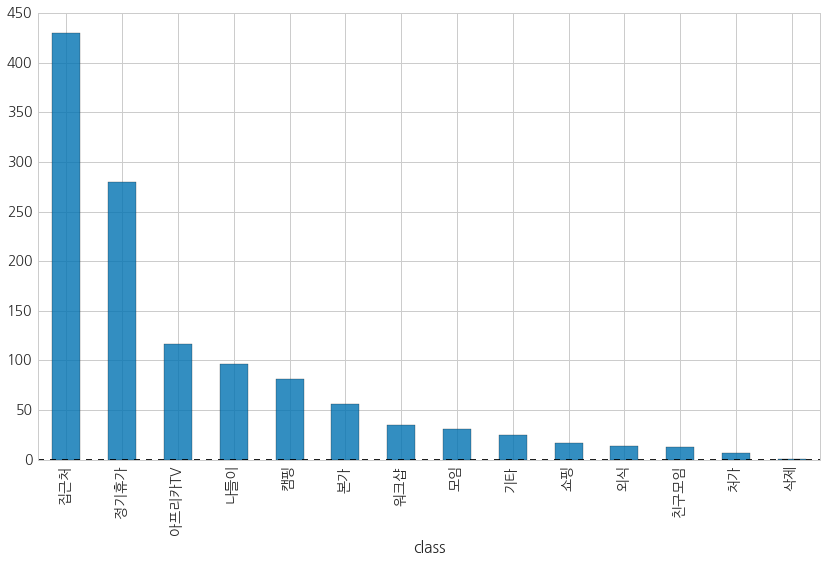

In [336]:
class_days.sort(u'사진수',ascending=False)[u'사진수'][-20:].plot(kind='bar', figsize=(14,8), alpha=.8)

---
장소별 보낸 날수 

In [325]:
place_days = pic_ds[pic_ds.latitude>0].groupby('place')\
    .agg({'date': lambda x: len(np.unique(x)), 'image_name':len})\
    .sort('date',ascending=False)
place_days.columns = [u'사진수', '방문일수']

In [326]:
place_days[:12].T

place,야탑_이전집근처,판교_회사,수지_집근처,태백_본가,야탑_야탑역근처,양평_캠핑장,분당_중앙공원,분당_,여주_처가,여주_캠핑장,베트남_다낭미케해변,수지_
사진수,223,116,207,56,30,45,9,12,8,22,19,14
방문일수,83,51,42,16,14,6,5,5,4,4,3,3


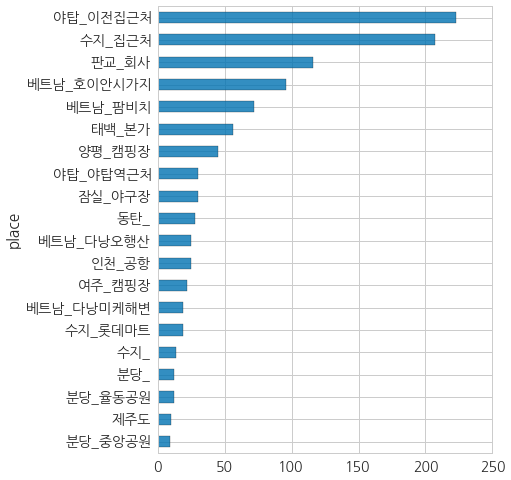

In [327]:
place_days.sort(u'사진수',ascending=True)[u'사진수'][-20:].plot(kind='barh', figsize=(6,8), alpha=.8)

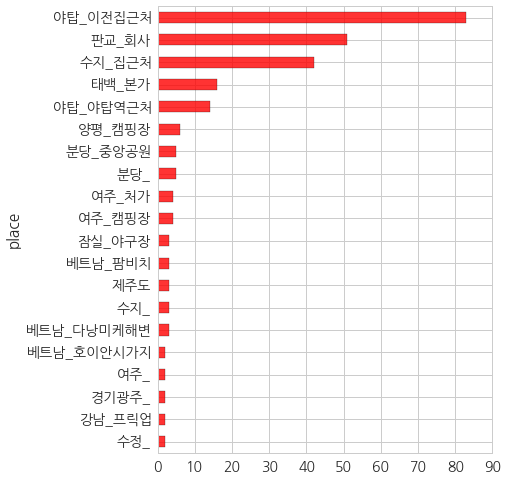

In [328]:
place_days.sort(u'방문일수',ascending=True)[u'방문일수'][-20:].plot(kind='barh', figsize=(6,8),color='r', alpha=.8)

In [342]:
pic_ds[::200].T

,875,384,318,144,635,1000,1200,1400
image_name,IMG_0958.JPG,IMG_0445.JPG,IMG_0379.JPG,IMG_0205.JPG,IMG_0705.JPG,IMG_1089.JPG,IMG_1424.JPG,IMG_1833.JPG
datetime,2012-03-23 18:53:24,2013-05-04 12:10:05,2014-01-10 18:41:54,2015-07-19 11:03:31,2016-02-05 15:29:17,2016-02-10 18:58:56,2016-04-19 10:56:46,2016-04-22 18:34:05
latitude,37.40967,37.51267,37.40134,37.27649,0,37.34137,37.45567,15.87715
longitude,127.1343,127.6368,127.1015,127.065,0,127.0978,126.4469,108.326
model,iPhone 4S,iPhone 4S,iPhone 4S,iPhone 4S,unknown,iPhone 6s,iPhone 6s,iPhone 6s
resolution,480X640,2448X3264,2448X3264,2448X3264,1836X1377,1932X2576,3024X4032,1932X2576
year,2012,2013,2014,2015,2016,2016,2016,2016
year_day,83.78681,124.5069,10.77847,200.4604,36.64514,41.79028,110.4556,113.7736
date,2012-03-23,2013-05-04,2014-01-10,2015-07-19,2016-02-05,2016-02-10,2016-04-19,2016-04-22
addr,경기도_성남시_분당구_야탑3동,KR_경기도_양평군_용문면,경기도_성남시_분당구_삼평동,경기도_수원시_영통구_하동,___,경기도_용인시_수지구_동천동,KR_인천광역시_중구_운서동,VN_Quang Nam Province_Hội An_Cẩm Phô
